# Callbacks

## 模型

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# 载入 MNIST 手写阿拉伯数字资料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 特征缩放，使用常态化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 设定优化器(optimizer)、损失函数(loss)、效能衡量指标(metrics)的类别
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## EarlyStopping callbacks

In [2]:
# validation loss 三个执行周期没改善就停止训练
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor = 'val_accuracy'),
]

In [3]:
# 训练 20 次，但实际只训练 12次就停止了
history = model.fit(x_train_norm, y_train, epochs=20, validation_split=0.2, 
                    callbacks=my_callbacks)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4543 - accuracy: 0.8683 - val_loss: 0.1327 - val_accuracy: 0.9618
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1328 - accuracy: 0.9602 - val_loss: 0.0998 - val_accuracy: 0.9700
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0921 - accuracy: 0.9731 - val_loss: 0.0861 - val_accuracy: 0.9747
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0719 - accuracy: 0.9781 - val_loss: 0.0889 - val_accuracy: 0.9733
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0566 - accuracy: 0.9822 - val_loss: 0.0769 - val_accuracy: 0.9771
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0822 - val_accuracy: 0.9768
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.0737 - val_accuracy:

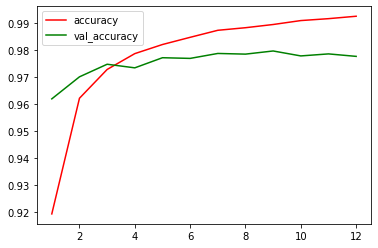

In [4]:
# 对训练过程的准确度绘图
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1,len(history.history['accuracy'])+1), history.history['accuracy'], 'r', label='accuracy')
plt.plot(np.arange(1,len(history.history['accuracy'])+1), history.history['val_accuracy'], 'g', label='val_accuracy')
plt.legend()

## 改为 val_loss

In [5]:
# validation loss 三个执行周期没改善就停止训练
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor = 'val_loss'),
]

In [6]:
# 训练 20 次，但实际只训练 12次就停止了
history = model.fit(x_train_norm, y_train, epochs=20, validation_split=0.2, 
                    callbacks=my_callbacks)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.0869 - val_accuracy: 0.9798
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0905 - val_accuracy: 0.9797
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0885 - val_accuracy: 0.9794
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0181 - accuracy: 0.9933 - val_loss: 0.0888 - val_accuracy: 0.9807


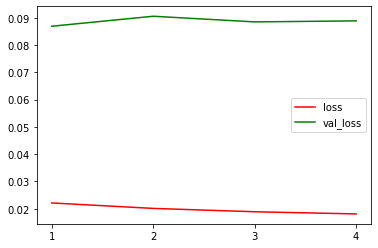

In [7]:
# 对训练过程的准确度绘图
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1,len(history.history['loss'])+1), history.history['loss'], 'r', label='loss')
plt.plot(np.arange(1,len(history.history['loss'])+1), history.history['val_loss'], 'g', label='val_loss')
plt.xticks(ticks=np.arange(1,len(history.history['loss'])+1))
plt.legend()

In [8]:
# 评估，打分数
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.07681187987327576, 0.982200026512146]

## ModelCheckpoint callback

In [9]:
# 定义 ModelCheckpoint callback
checkpoint_filepath = 'model.{epoch:02d}.h5' # 存档名称，可用 f-string 变数
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, # 设定存档名称
    save_weights_only=True,       # 只存权重
    monitor='val_accuracy',       # 监看验证资料的准确率
    mode='max',           # 设定save_best_only=True时，best是指 max or min
    save_best_only=True)          # 只存最好的模型

EPOCHS = 3  # 训练 3 次
model.fit(x_train_norm, y_train, epochs=EPOCHS, validation_split=0.2, 
          callbacks=[model_checkpoint_callback])

Epoch 1/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0938 - val_accuracy: 0.9813
Epoch 2/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0166 - accuracy: 0.9942 - val_loss: 0.0999 - val_accuracy: 0.9791
Epoch 3/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0908 - val_accuracy: 0.9818


In [10]:
# 再训练 3 次，观察 accuracy，会接续上一次，继续改善 accuracy。
model.fit(x_train_norm, y_train, epochs=EPOCHS, validation_split=0.2,  
          callbacks=[model_checkpoint_callback])

Epoch 1/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.0886 - val_accuracy: 0.9810
Epoch 2/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0926 - val_accuracy: 0.9810
Epoch 3/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0133 - accuracy: 0.9952 - val_loss: 0.0995 - val_accuracy: 0.9806


## TensorBoard callback

In [11]:
# 定义 tensorboard callback
tensorboard_callback = [tf.keras.callbacks.TensorBoard(log_dir='.\\logs', 
                       histogram_freq=1)]

# 训练 5 次
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2,
                    callbacks=tensorboard_callback)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0972 - val_accuracy: 0.9793
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0124 - accuracy: 0.9954 - val_loss: 0.0926 - val_accuracy: 0.9812
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0122 - accuracy: 0.9958 - val_loss: 0.1097 - val_accuracy: 0.9797
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.1065 - val_accuracy: 0.9794
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0130 - accuracy: 0.9956 - val_loss: 0.1058 - val_accuracy: 0.9796


In [12]:
# 载入 TensorBoard notebook extension，即可在 jupyter notebook 启动 Tensorboard
%load_ext tensorboard

# 启动 Tensorboard
%tensorboard --logdir ./logs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 14764.

In [13]:
# 可同时定义多个Callback事件
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
model.fit(x_train_norm, y_train, epochs=10, callbacks=my_callbacks)

NameError: name 'dataset' is not defined